<h1> PTRAIL Interpolation </h1>
<h2> Random Walk and Kinematic Interpolation</h2>
<p>
    This Notebook contains the examples for Radnom Walk and Kinematic Interpolations.
    It reads a file and interpolates points first using Random Walk and then Kinematic
    interpolation method by providing the dataframe and a time difference
    threshold beyond which points need to be interpolated and the interpolation
    type which by default is linear. The original data, and interpolated datas are
    all plotted to show the difference between trajectories. Segments of the original datas
    are taken and interpolated, and by plotting it a clear difference in the interpolation points are shown.
</p>

<hr>

The following datasets have been :
<ul>
   <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/gulls.csv" target="_blank"> Seagulls Dataset </a> </li>
   <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/atlantic.csv%22%3E"> Hurricane Dataset </a> </li>
</ul>

In [1]:
from ptrail.core.TrajectoryDF import PTRAILDataFrame
from ptrail.core.Datasets import Datasets
from ptrail.preprocessing.interpolation import Interpolation as ip
from ptrail.utilities.conversions import Conversions as con
import folium
from IPython.display import display
import matplotlib.pyplot as plt
import ptrail.utilities.constants as const
import pandas as pd


In [2]:
%%time

# Import the seagulls dataset.
np_gulls = Datasets.load_seagulls()
np_gulls.head()

------------------------ Dataset Facts ------------------------------

Number of unique Trajectories in the data: 126
Number of points in the data: 89869
Dataset time range: 2285 days 08:55:00
Datatype of the DataFrame: <class 'ptrail.core.TrajectoryDF.PTRAILDataFrame'>
Dataset Bounding Box: (-62.71617, 4.02517, 65.2325, 103.19317)

---------------------------------------------------------------------
CPU times: user 227 ms, sys: 62.3 ms, total: 289 ms
Wall time: 1.16 s


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [3]:
# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_gulls = np_gulls.reset_index().loc[np_gulls.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_gulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     1501
False     469
Name: DateTime, dtype: int64


In [4]:
# Here, we plot the smaller trajectory on a folium map.
sw = small_gulls[['lat', 'lon']].min().values.tolist()
ne = small_gulls[['lat', 'lon']].max().values.tolist()
coords = [zip(small_gulls[const.LAT], small_gulls[const.LONG])]
m1 = folium.Map()

folium.PolyLine(coords,
                color='blue',
                weight=2,
                opacity=0.7).add_to(m1)
m1.fit_bounds([sw, ne])
display(m1)

In [5]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using random-walk interpolation.

small_rw_gulls = ip.interpolate_position(small_gulls,
                                          3600*4,
                                          ip_type='random-walk')
print(f"Original Length: {len(small_gulls)}")
print(f"Interpolated Length: {len(small_rw_gulls)}")

Original Length: 1970
Interpolated Length: 3471
CPU times: user 17.9 ms, sys: 17.9 ms, total: 35.8 ms
Wall time: 4.36 s


In [6]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using kinematic interpolation.

small_kin_gulls = ip.interpolate_position(small_gulls,
                                          3600*4,
                                          ip_type='kinematic')
print(f"Original Length: {len(small_gulls)}")
print(f"Interpolated Length: {len(small_kin_gulls)}")

Original Length: 1970
Interpolated Length: 3470
CPU times: user 22.6 ms, sys: 12.9 ms, total: 35.5 ms
Wall time: 3.76 s


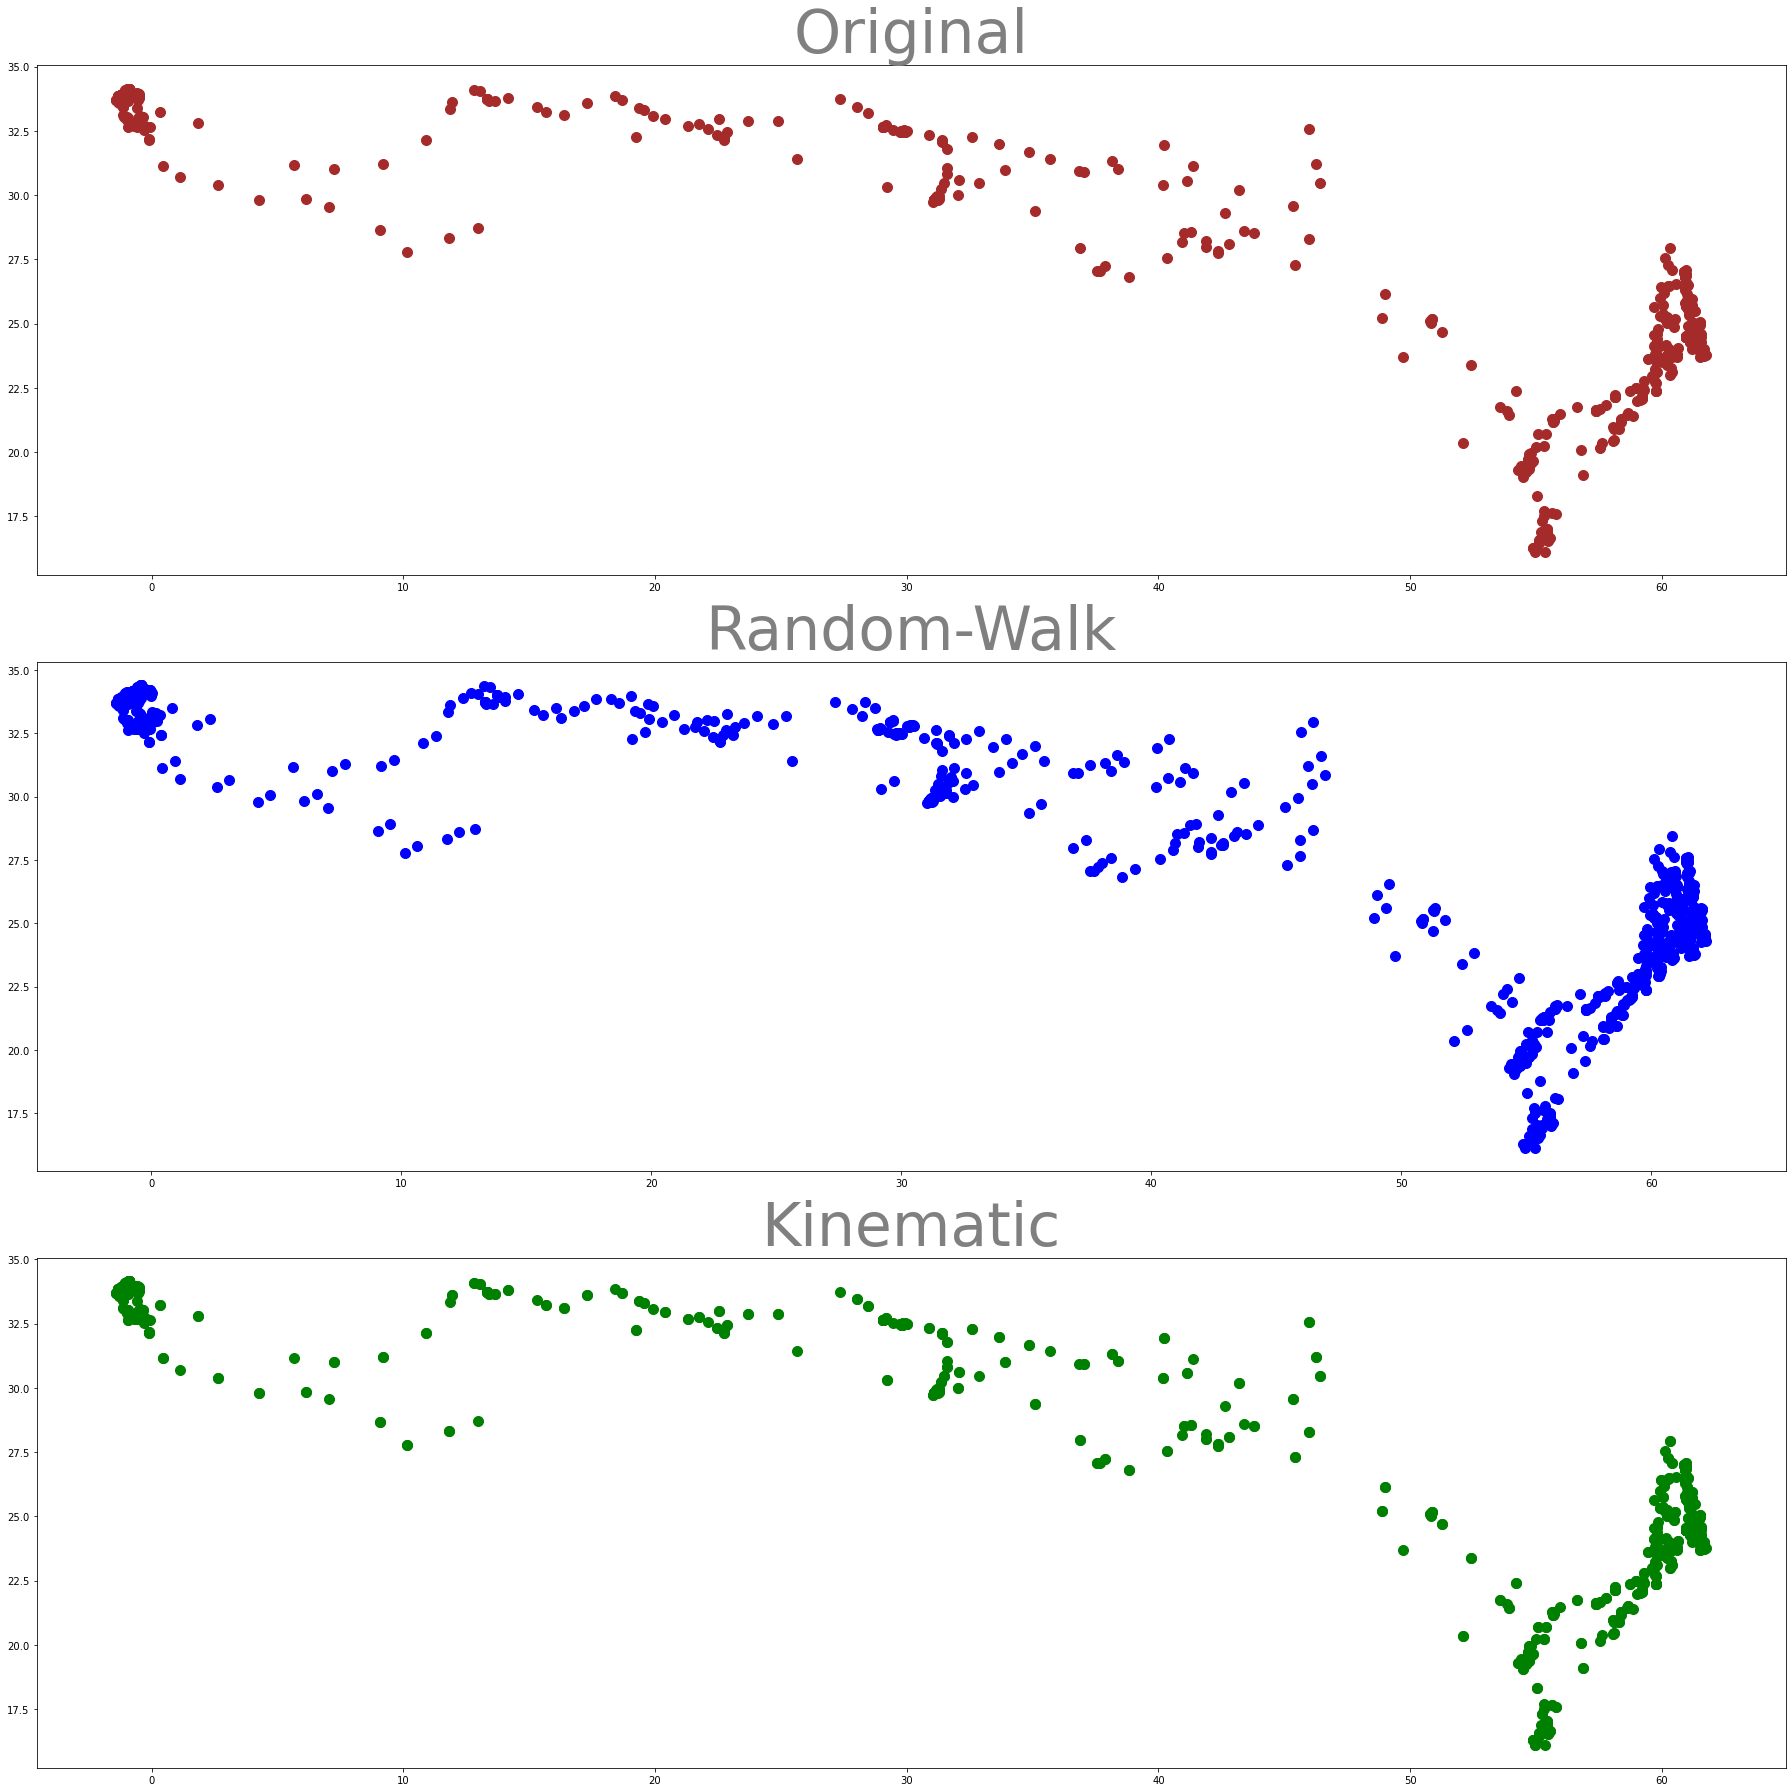

In [7]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_gulls[const.LAT],
                small_gulls[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_rw_gulls[const.LAT],
                small_rw_gulls[const.LONG],
                s=100, color='blue')
axes[1].set_title('Random-Walk', fontsize=60, color='grey')
axes[2].scatter(small_kin_gulls[const.LAT],
                small_kin_gulls[const.LONG],
                s=100, color='green')
axes[2].set_title('Kinematic', fontsize=60, color='grey')

fig.tight_layout()

In [8]:
# Import the Atlantic Hurricanes Dataset.
np_atlantic = Datasets.load_hurricanes()
np_atlantic.head()

------------------------ Dataset Facts ------------------------------

Number of unique Trajectories in the data: 1814
Number of points in the data: 49105
Dataset time range: 60041 days 12:00:00
Datatype of the DataFrame: <class 'ptrail.core.TrajectoryDF.PTRAILDataFrame'>
Dataset Bounding Box: (7.2, -109.5, 81.0, 63.0)

---------------------------------------------------------------------


Name      Date  Time Event  \
traj_id  DateTime                                                         
AL011851 1851-06-25 00:00:00              UNNAMED  18510625     0         
         1851-06-25 06:00:00              UNNAMED  18510625   600         
         1851-06-25 12:00:00              UNNAMED  18510625  1200         
         1851-06-25 18:00:00              UNNAMED  18510625  1800         
         1851-06-25 21:00:00              UNNAMED  18510625  2100     L   

                             Status   lat   lon  Maximum Wind  \
traj_id  DateTime                                               
AL011851 1851-06-25 00:00:00     HU  28.0 -94.8            80   
         1851-06-25 06:00:00     HU  28.0 -95.4            80   
         1851-06-25 12:00:00     HU  28.0 -96.0            80   
         1851-06-25 18:00:00     HU  28.1 -96.5            80   
         1851-06-25 21:00:00     HU  28.2 -96.8            80   

                              Minimum Pressure  Low Wind NE  ...  Low Wind SW  \
traj_id  DateTime                                            ...                
AL011851 1851-06-25 00:00:00              -999         -999  ...         -999   
         1851-06-25 06:00:00              -999         -999  ...         -999   
         1851-06-25 12:00:00              -999         -999  ...         -999   
         1851-06-25 18:00:00              -999         -999  ...         -999   
         1851-06-25 21:00:00              -999         -999  ...         -999   

                              Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
traj_id  DateTime                                                               
AL011851 1851-06-25 00:00:00         -999              -999              -999   
         1851-06-25 06:00:00         -999              -999              -999   
         1851-06-25 12:00:00         -999              -999              -999   
         1851-06-25 18:00:00         -999              -999              -999   
         1851-06-25 21:00:00         -999              -999              -999   

                              Moderate Wind SW  Moderate Wind NW  \
traj_id  DateTime                                                  
AL011851 1851-06-25 00:00:00              -999              -999   
         1851-06-25 06:00:00              -999              -999   
         1851-06-25 12:00:00              -999              -999   
         1851-06-25 18:00:00              -999              -999   
         1851-06-25 21:00:00              -999              -999   

                              High Wind NE  High Wind SE  High Wind SW  \
traj_id  DateTime                                                        
AL011851 1851-06-25 00:00:00          -999          -999          -999   
         1851-06-25 06:00:00          -999          -999          -999   
         1851-06-25 12:00:00          -999          -999          -999   
         1851-06-25 18:00:00          -999          -999          -999   
         1851-06-25 21:00:00          -999          -999          -999   

                              High Wind NW  
traj_id  DateTime                           
AL011851 1851-06-25 00:00:00          -999  
         1851-06-25 06:00:00          -999  
         1851-06-25 12:00:00          -999  
         1851-06-25 18:00:00          -999  
         1851-06-25 21:00:00          -999  

[5 rows x 21 columns]

In [9]:
# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_atlantic = np_atlantic.reset_index().loc[np_atlantic.reset_index()[const.TRAJECTORY_ID] == 'AL062010'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_gulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())

True     1501
False     469
Name: DateTime, dtype: int64


In [10]:
# Here, we plot the smaller trajectory on a folium map.
sw = small_atlantic[['lat', 'lon']].min().values.tolist()
ne = small_atlantic[['lat', 'lon']].max().values.tolist()
coords = [zip(small_atlantic[const.LAT], small_atlantic[const.LONG])]
m2 = folium.Map()

folium.PolyLine(coords,
                color='blue',
                weight=2,
                opacity=0.7).add_to(m2)
m2.fit_bounds([sw, ne])
display(m2)

In [11]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using random-walk interpolation.

small_rw_atlantic = ip.interpolate_position(small_atlantic,
                                            3600*4,
                                            ip_type='random-walk')
print(f"Original Length: {len(small_atlantic)}")
print(f"Interpolated Length: {len(small_rw_atlantic)}")

Original Length: 51
Interpolated Length: 101
CPU times: user 15.6 ms, sys: 28.2 ms, total: 43.8 ms
Wall time: 401 ms


In [12]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using kinematic interpolation.

small_kin_atlantic = ip.interpolate_position(small_atlantic,
                                          3600*4,
                                          ip_type='kinematic')
print(f"Original Length: {len(small_atlantic)}")
print(f"Interpolated Length: {len(small_kin_atlantic)}")

Original Length: 51
Interpolated Length: 100
CPU times: user 19 ms, sys: 41.2 ms, total: 60.2 ms
Wall time: 519 ms


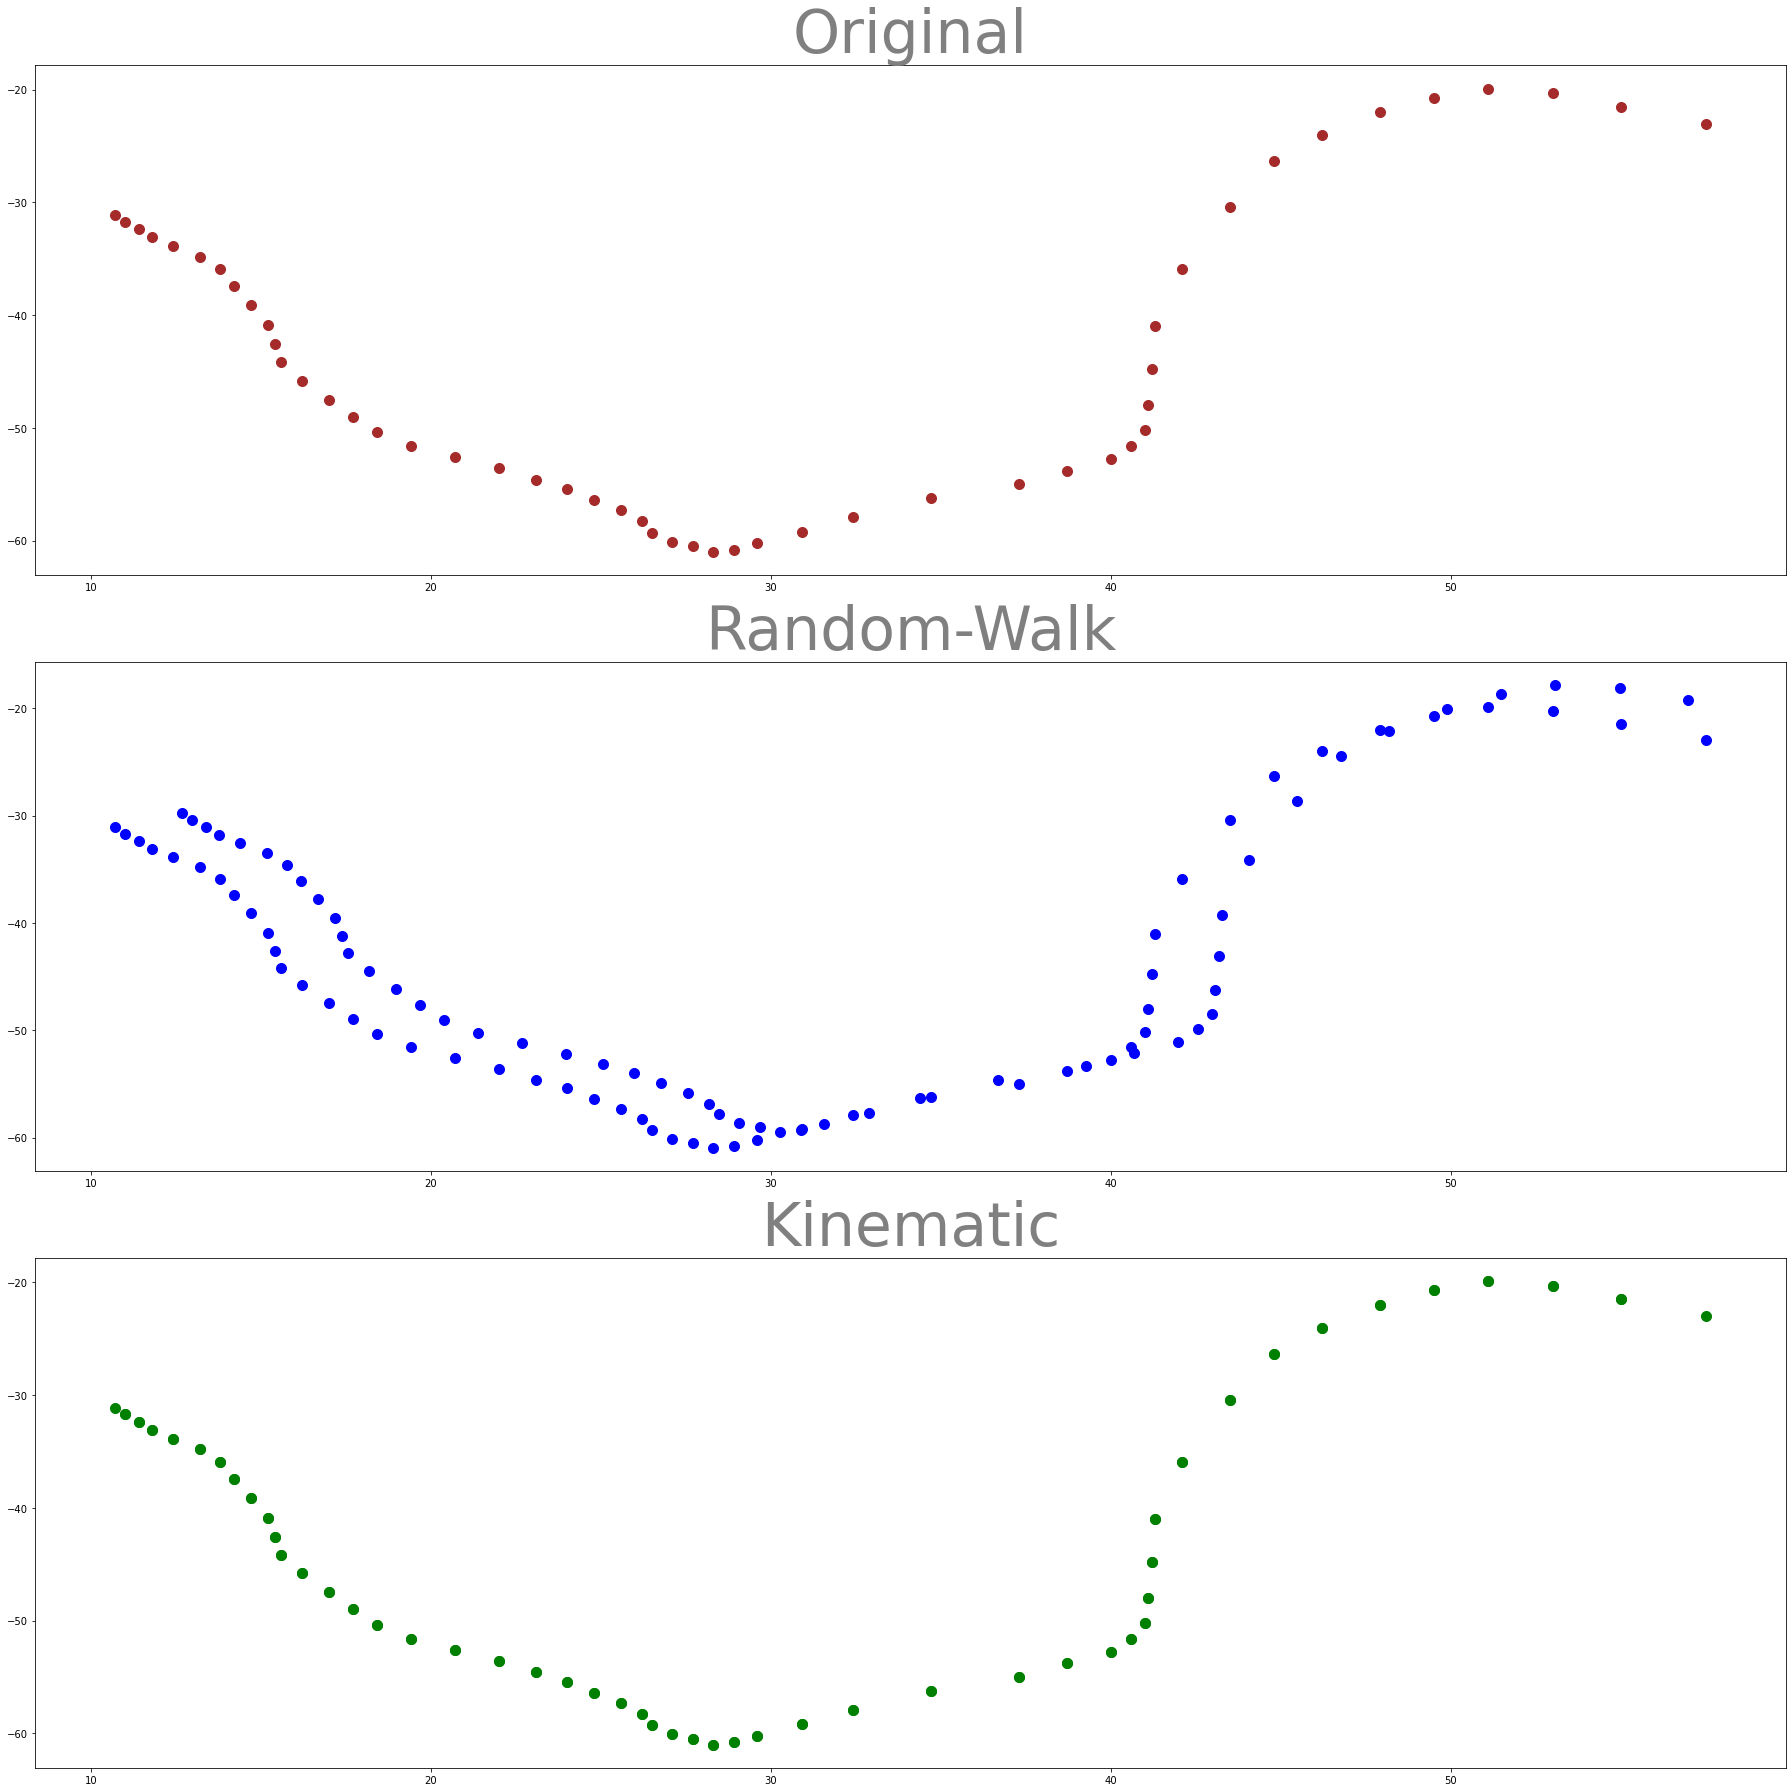

In [13]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_atlantic[const.LAT],
                small_atlantic[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_rw_atlantic[const.LAT],
                small_rw_atlantic[const.LONG],
                s=100, color='blue')
axes[1].set_title('Random-Walk', fontsize=60, color='grey')
axes[2].scatter(small_kin_atlantic[const.LAT],
                small_kin_atlantic[const.LONG],
                s=100, color='green')
axes[2].set_title('Kinematic', fontsize=60, color='grey')

fig.tight_layout()

In [17]:
%%time

"""
    Finally, here we show how an entire Dataframe containing
    several trajectories can be passed to the interpolation
    function and how the number of points will be added
    to the dataframe based on the user-provided time jump.
"""

# Here, Interpolate the original seagulls dataset using random-walk
# interpolation and then show the difference in the number of
# points to see how the dataframe's trajectories have been
# interpolated.

rw_ip_gulls = ip.interpolate_position(dataframe=np_gulls,
                                      sampling_rate=3600*4,
                                      ip_type='random-walk')
print(f"Original DF length: {len(np_gulls)}")
print(f"Random-Walk Interpolated DF length: {len(rw_ip_gulls)}")

Original DF length: 89869
Random-Walk Interpolated DF length: 157775
CPU times: user 117 ms, sys: 125 ms, total: 241 ms
Wall time: 40.6 s


In [16]:
%%time

# Here, Interpolate the original seagulls dataset using kinematic
# interpolation and then show the difference in the number of
# points to see how the dataframe's trajectories have been
# interpolated.

kin_ip_gulls = ip.interpolate_position(dataframe=np_gulls,
                                       sampling_rate=3600*4,
                                       ip_type='kinematic')
print(f"Original DF length: {len(np_gulls)}")
print(f"Kinematic Interpolated DF length: {len(kin_ip_gulls)}")



Original DF length: 89869
Kinematic Interpolated DF length: 157670
CPU times: user 107 ms, sys: 130 ms, total: 237 ms
Wall time: 38.4 s
